# e7 Validation Pt III - 18th October 2019

### Comparing reconstructions of 3min & 4h listmode data from the <sup>68</sup>Ge NEMA phantom.......again..........again

Using LIFEx v5.38, sent by Christophe Nioche from LIFEx Support Team.

New version (not available to the general public!) enables unit conversion in the scripting:

```python
# Patient 0
LIFEx.texture.Session0.Img0=/path/to/image/
LIFEx.texture.Session0.Img0.unitY=kBq/mL
```

NOTE - make sure you've got capitals in the right place in the `unitY` line! 


In [23]:
from glob import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Tried to make things simpler here by condensing the codes which load in data
# from .xls files (seen in the other e7_validation Notebooks) into a separate 
# python file (e7_validation_functions.py)
from e7_validation_functions import import_e7val_data,get_xydata

In [24]:
prefix = "/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3/RoiValue/{}" # important to have the {} - don't forget this!
dl,lf = import_e7val_data(prefix,datafile_type="csv")
xlist3m,ylist = get_xydata(lf,dl,include_all_valid=False,scan_length=3.)
xlist4h,_ = get_xydata(lf,dl,include_all_valid=False,scan_length=240.)
diffplotDF = pd.DataFrame(data={"Titles":ylist+ylist,"MaxDiff":xlist3m+xlist4h,"ScanLength":["3 min" for i in range(0,len(ylist))]+["4 hour" for i in range(0,len(ylist))]})

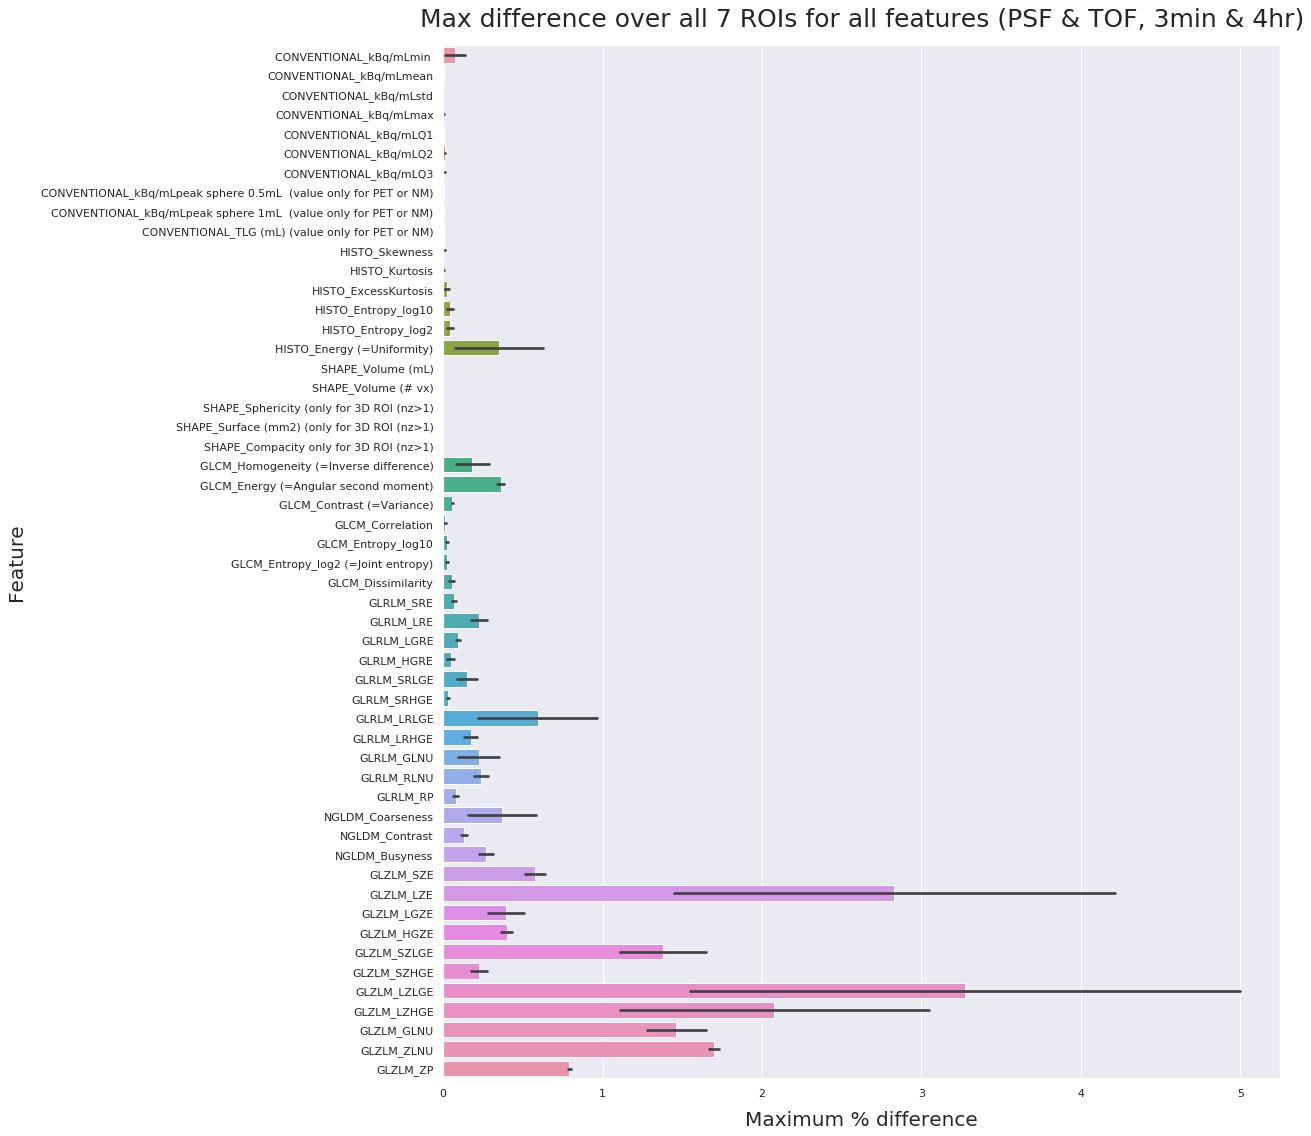

In [25]:
fig = plt.figure(figsize=(15,19))
ax = fig.add_subplot(1, 1, 1)
#sns.factorplot(x="MaxDiff",y="Titles",hue="ScanLength",data=diffplotDF,kind="bar")
sns.barplot(x="MaxDiff",y="Titles",data=diffplotDF)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("Max difference over all 7 ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot.png",format='png', bbox_inches = "tight")
plt.show()
plt.close()